In [1]:
from sklearn import datasets

In [2]:
digits=datasets.load_digits()

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

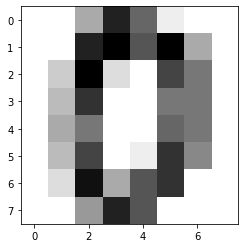

In [4]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

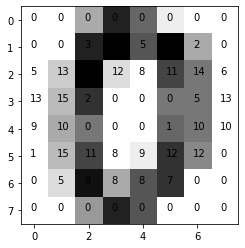

In [15]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15,j,int(digits.images[0][i][j]))

In [5]:
import numpy as np

In [6]:
np.matrix.flatten(digits.images[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
np.matrix.flatten(digits.images[0])/15

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [8]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [9]:
v=np.matrix.flatten(digits.images[0]/15)
result=random_classifier(v)
result

array([0.4540675 , 0.85952591, 0.00492731, 0.11960188, 0.47201649,
       0.9361391 , 0.37002491, 0.01252226, 0.0940825 , 0.02614351])

In [10]:
list(result).index(max(result))

5

In [11]:
digits.target[0]

0

In [12]:
def test_digit_classify(classifier,test_count=1000):
    correct=0
    for img,target in zip(digits.images[:test_count],digits.target[:test_count]):
        v=np.matrix.flatten(img)/15
        output=classifier(v)
        answer=list(output).index(max(output))
        if answer==target:
            correct+=1
    return (correct/test_count)

In [14]:
test_digit_classify(random_classifier)

0.116

In [17]:
test=np.array([5.00512567e-06, 3.94168539e-05, 5.57124430e-09, 9.31981207e-09,
       9.98060276e-01, 9.10328786e-07, 1.56262695e-03, 1.82976466e-04,
       1.48519455e-04, 2.54354113e-07])

In [18]:
list(test).index(max(test))

4

In [19]:
def average_img(i):
    imgs=[img for img,target in zip(digits.images[1000:],digits.target[1000:]) if target==i]
    return sum(imgs)/len(imgs)

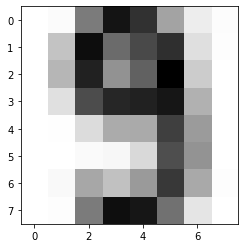

In [20]:
plt.imshow(average_img(9), cmap=plt.cm.gray_r)

In [21]:
len(digits.images)

1797

In [24]:
avg_digits=[np.matrix.flatten(average_img(i)) for i in range(10)]
def compare_to_avg(v):
    return [np.dot(v,avg_digits[i]) for i in range(10)]

In [25]:
test_digit_classify(compare_to_avg)

0.853